## Read the dataset into a pandas dataframe

In [2]:
import pandas as pd

df = pd.read_csv('MBTI 500.csv')

In [3]:
df

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


### Posts are equal-sized: about 500 words per sample.

In [5]:
word_counts = df['posts'].apply(lambda x: len(str(x).split()))

In [6]:
word_counts

0         501
1         501
2         501
3         501
4         501
         ... 
106062    499
106063    499
106064    499
106065    499
106066    499
Name: posts, Length: 106067, dtype: int64

## Check null values

In [7]:
df.isnull().sum()

posts    0
type     0
dtype: int64

In [8]:
# 16 personality
df['type'].unique()

array(['INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'ENFJ', 'ENFP',
       'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP'],
      dtype=object)

In [9]:
print("They are {%s} types of classified MBTI posts." %(df['type'].unique()))

They are {['INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP' 'ENFJ' 'ENFP' 'ENTJ' 'ENTP'
 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP']} types of classified MBTI posts.


In [10]:
df.type.value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

## Group by the type

In [11]:
groups = df.groupby('type')
groups.describe()

posts                                                               
      count unique                                                top freq
type                                                                      
ENFJ   1534   1534  low self esteem almost desperate need notice s...    1
ENFP   6167   6167  depression wonder want acknowledge eq cause wo...    1
ENTJ   2955   2955  well glad shit fight inner city rural unejucat...    1
ENTP  11725  11725  idea scifi movie oh year yeah probably new typ...    1
ESFJ    181    181  actress anything advice take job show love par...    1
ESFP    360    360  may view obvious cue interest way go drink guy...    1
ESTJ    482    482  unnecessary habit like go change give structur...    1
ESTP   1986   1986  follow ideology hat want talk wahabbism go sta...    1
INFJ  14963  14963  answer phone like talk close friend phone gene...    1
INFP  12134  12134  good intention go subreddit guideline stuff re...    1
INTJ  22427  22427  open organization strenhs analysis research et...    1
INTP  24961  24961  well long live high chance fatal accident user...    1
ISFJ    650    650  lion nice ironically author end make look isfj...    1
ISFP    875    875  play imo cool think true realize relate mbti w...    1
ISTJ   1243   1243  would get item list rather group like item e l...    1
ISTP   3424   3424  yes one special edit sorry dick response great...    1

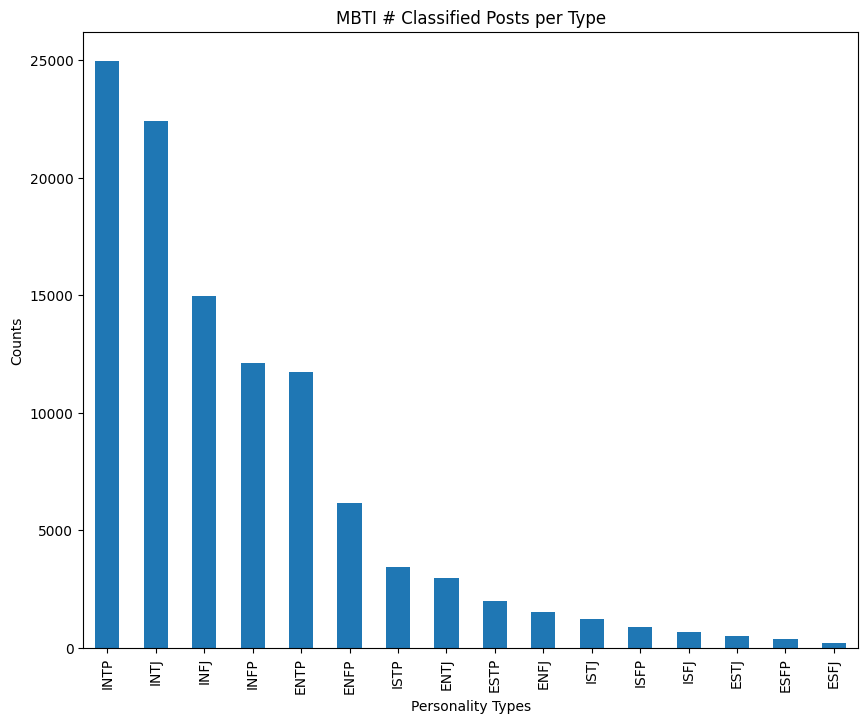

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
groups.size().sort_values(ascending=False).plot.bar()
plt.xlabel("Personality Types")
plt.ylabel("Counts")
plt.title("MBTI # Classified Posts per Type")
plt.show()

In [13]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/liuli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/liuli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords

def preprocess_text(posts):
    # Tokenize the text into words
    words = posts.split(" ")
    
    # Remove stop words
    stoplist = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stoplist]
    
    # Stem the words
    stemmer = nltk.PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Extract linguistic features
    word_freq = nltk.FreqDist(words)
    
    return word_freq

## ENFJ posts

In [15]:
# drop - to avoid the old index being added as a column
group_enfj = groups.get_group("ENFJ").reset_index(drop=True)
group_enfj

,posts,type
0,yeah quite like idea actually think could numb...,ENFJ
1,idea thing thing value others perceive relevan...,ENFJ
2,respect say year sound bite silly might soft r...,ENFJ
3,interaction unavoidable witness student intern...,ENFJ
4,core probably see relationship work also sound...,ENFJ
...,...,...
1529,entj w sx xd everything ok nothing sister lot ...,ENFJ
1530,entj istj suggest type think thank clarify who...,ENFJ
1531,porcelain youtube tell laura love ray paterson...,ENFJ
1532,usually terrify emotional pyro masochistic ben...,ENFJ


In [16]:
enfj_posts = ""
for i in range(group_enfj.shape[0]):
    enfj_posts += group_enfj['posts'].iloc[i]

In [17]:
word_freq = preprocess_text(enfj_posts)

In [18]:
word_freq

FreqDist({'like': 11376, 'think': 9228, 'peopl': 8939, 'feel': 7426, 'get': 7195, 'make': 6290, 'know': 6276, 'thing': 5880, 'say': 5437, 'realli': 5413, ...})

Text(0.5, 1.0, 'Word frequency of ENFJ posts')

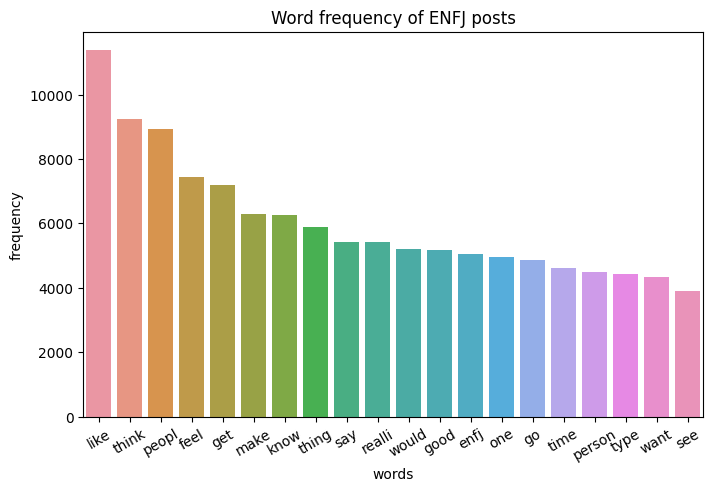

In [19]:
import seaborn as sns

## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = word_freq.most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(8,5))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of ENFJ posts")

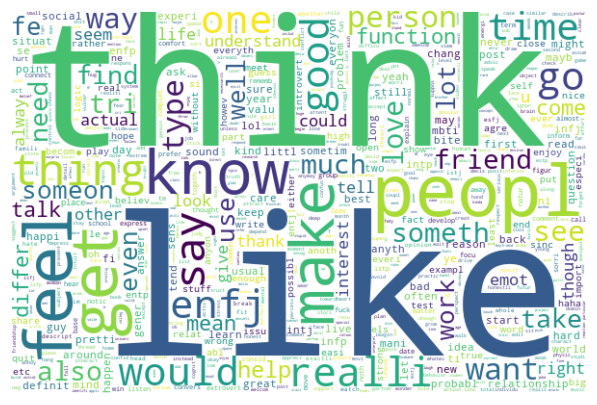

In [20]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## ISTJ posts

In [21]:
group_istj = groups.get_group("ISTJ").reset_index(drop=True)
group_istj

,posts,type
0,want create entj isfj one lolz please let star...,ISTJ
1,click bias obviously definitely learn play gui...,ISTJ
2,description actually istps though also see unn...,ISTJ
3,interest story take couple paragraph warm some...,ISTJ
4,righteous however even flaw one perfect every ...,ISTJ
...,...,...
1238,day try come career path sure color ask answer...,ISTJ
1239,skycloud pride aware thank abbiscuits actually...,ISTJ
1240,actually come affectionate verbally affirm ist...,ISTJ
1241,theatrical trailer unite artist youtube top dr...,ISTJ


In [22]:
istj_posts = ""
for i in range(group_istj.shape[0]):
    istj_posts += group_istj['posts'].iloc[i]

In [23]:
word_freq_istj = preprocess_text(istj_posts)

In [24]:
word_freq_istj

FreqDist({'like': 9135, 'get': 6579, 'think': 6458, 'peopl': 5650, 'go': 5099, 'thing': 4795, 'time': 4776, 'make': 4616, 'know': 4596, 'would': 4508, ...})

Text(0.5, 1.0, 'Word frequency of ISTJ posts')

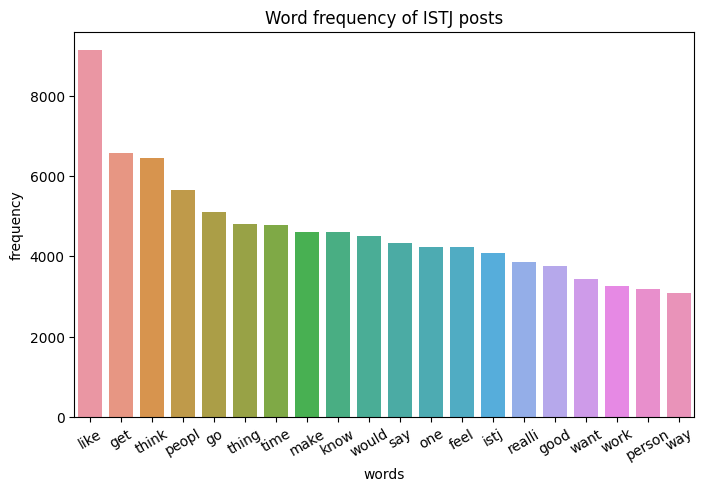

In [25]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = word_freq_istj.most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(8,5))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of ISTJ posts")

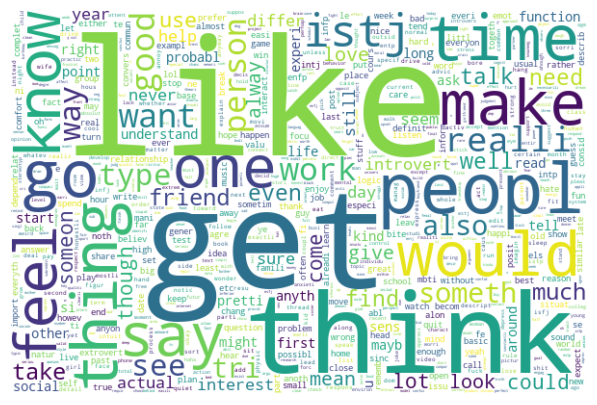

In [26]:
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq_istj)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## ISFJ posts

In [27]:
group_isfj = groups.get_group("ISFJ").reset_index(drop=True)
group_isfj

,posts,type
0,like spring feel energetic season whatever rea...,ISFJ
1,ridiculous like stress angry think straight ge...,ISFJ
2,call muiple people bid save face slowly realiz...,ISFJ
3,talk etc end coworkers friend ask hang day rea...,ISFJ
4,ive try learn pick feel apart constantly like ...,ISFJ
...,...,...
645,ago think enfp ambitious friendly enthusiastic...,ISFJ
646,opinion ugh mean quote fluffytheanarchist prob...,ISFJ
647,diamond best woman like black pearl cologne me...,ISFJ
648,legally drink awful stuff throw happen drink m...,ISFJ


In [28]:
isfj_posts = ""
for i in range(group_isfj.shape[0]):
    isfj_posts += group_isfj['posts'].iloc[i]

In [29]:
word_freq_isfj = preprocess_text(isfj_posts)

In [30]:
word_freq_isfj

FreqDist({'like': 5141, 'think': 4149, 'peopl': 3454, 'get': 3305, 'thing': 2853, 'feel': 2643, 'make': 2573, 'isfj': 2570, 'say': 2483, 'know': 2424, ...})

Text(0.5, 1.0, 'Word frequency of ISFJ posts')

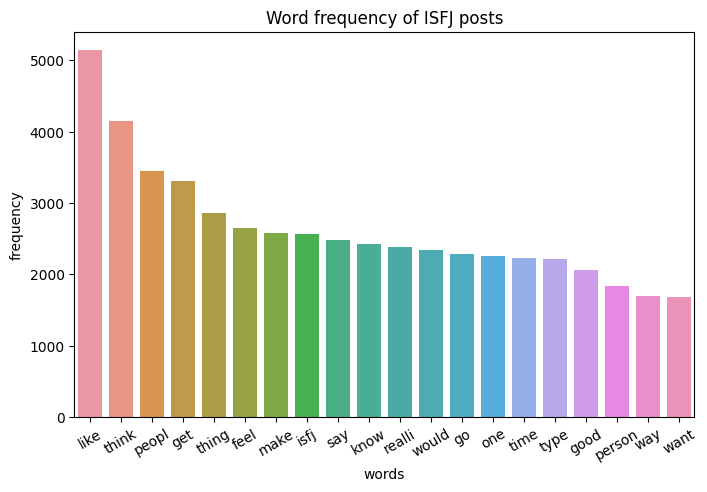

In [31]:
all_fdist = word_freq_isfj.most_common(20)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(8,5))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of ISFJ posts")

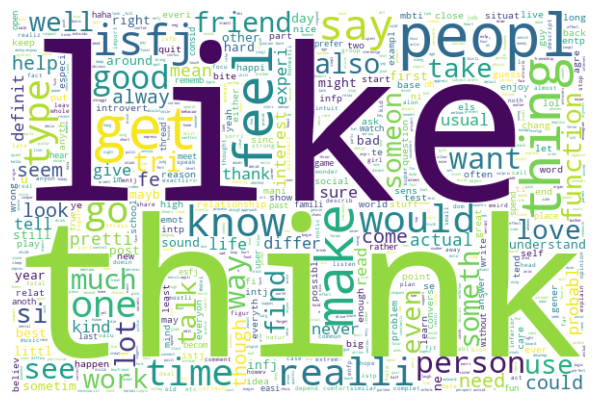

In [32]:
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq_isfj)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## ESTJ posts

In [33]:
group_estj = groups.get_group("ESTJ").reset_index(drop=True)
group_estj

,posts,type
0,interest question well dress jean crop sunny w...,ESTJ
1,jeg forstår ikke hvorfor vi skulle så meget im...,ESTJ
2,enjoy large group friend want blend crowd joke...,ESTJ
3,conversation kinect camera support k webcam su...,ESTJ
4,definitely give managerial get shit get fuck v...,ESTJ
...,...,...
477,awesome site carefully plan schedule sorry xd ...,ESTJ
478,probably save worth food buy anymore even buy ...,ESTJ
479,outside greece care one greek imigrants care c...,ESTJ
480,much without say qustion infjs make u people i...,ESTJ


In [34]:
estj_posts = ""
for i in range(group_estj.shape[0]):
    estj_posts += group_estj['posts'].iloc[i]

In [35]:
word_freq_estj = preprocess_text(estj_posts)

In [36]:
word_freq_estj

FreqDist({'like': 2955, 'think': 2885, 'peopl': 2083, 'get': 1889, 'type': 1851, 'det': 1749, 'er': 1736, 'would': 1522, 'make': 1505, 'say': 1476, ...})

Text(0.5, 1.0, 'Word frequency of ESTJ posts')

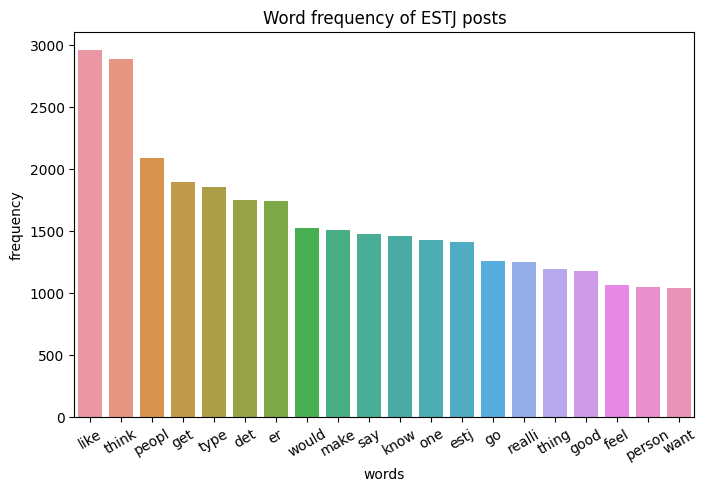

In [37]:
all_fdist = word_freq_estj.most_common(20)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(8,5))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of ESTJ posts")

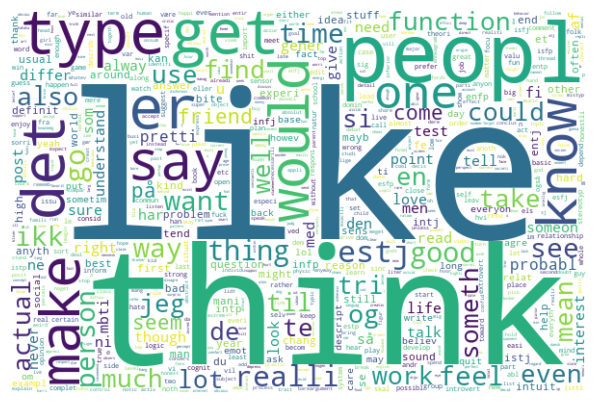

In [38]:
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq_estj)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## INTP Posts

In [39]:
group_intp = groups.get_group("INTP").reset_index(drop=True)
group_intp

,posts,type
0,watch bite everything include hentai tend enjo...,INTP
1,like goal personally appeal probably wrong see...,INTP
2,fill unfortunately read habit want learn prefe...,INTP
3,people idea reason enjoy leadership role like ...,INTP
4,state grievance ego lack skill find polarize w...,INTP
...,...,...
24956,rational one specific individual way express o...,INTP
24957,go part time lover extra lover interest see is...,INTP
24958,frustration think much little want doer want p...,INTP
24959,cuure offer case come place never depend many ...,INTP


In [40]:
intp_posts = ""
for i in range(group_intp.shape[0]):
    intp_posts += group_intp['posts'].iloc[i]

In [41]:
word_freq_intp = preprocess_text(intp_posts)

Text(0.5, 1.0, 'Word frequency of ESTJ posts')

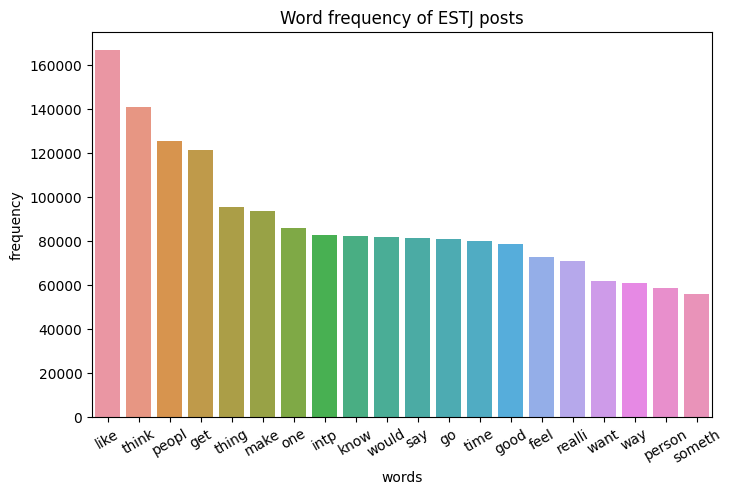

In [42]:
all_fdist = word_freq_intp.most_common(20)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(8,5))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of ESTJ posts")

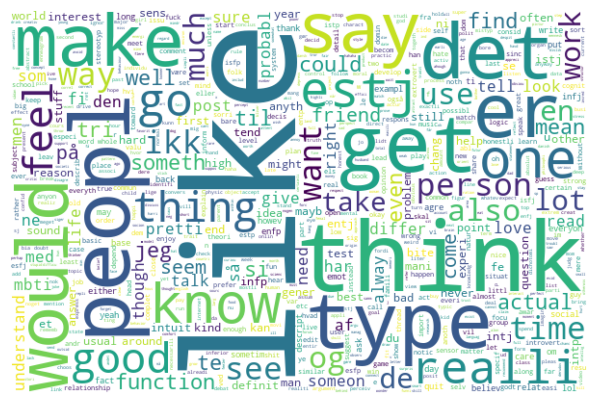

In [43]:
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq_estj)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Build Model

In [44]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # replace all HTML tags with ''
    text = re.sub('<.*?>', '', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
    # convert to lowercase
    text = text.lower()
    
    # tokenize the text
    tokens = word_tokenize(text)
    
    # remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # perform stemming
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # perform lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    
    # join the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [45]:
df['cleaned_posts'] = df['posts'].apply(preprocess_text)

In [46]:
df_sampled = df.sample(frac=0.1)

In [61]:
df_sampled.shape

(10607, 3)

In [66]:
df.shape

(106067, 3)

In [62]:
X = df_sampled.iloc[:, -1]
Y = df_sampled.iloc[:, 1]

In [63]:
X

14001    want kid long time someth rais littl prodigi a...
30060    say u intp weird fe least develop primari func...
31426    pretti look cute physic appear get awe endear ...
85284    close sun wing hmm want relationship univers r...
45035    year person prefer latter big garden shoot arr...
                               ...                        
65851    dare interject defend point inconsist pile man...
86460    week still wait return start work communic min...
87931    person strenh find stimul bet think noth wrong...
57150    way hungri instead yes answer ask realli mean ...
8641     abil logic dissect situat may play uninterest ...
Name: cleaned_posts, Length: 10607, dtype: object

In [64]:
Y

14001    INTJ
30060    INTP
31426    INTP
85284    INFJ
45035    INTP
         ... 
65851    ENTP
86460    INFJ
87931    INFJ
57150    ENFP
8641     INTJ
Name: type, Length: 10607, dtype: object

In [65]:
# sample

# sampled_X = X.sample(frac=0.5)

In [65]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)
print(len(train_x), 'for train')
print(len(test_x), 'for test')

8485 for train
2122 for test


In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_y)

train_y = le.transform(train_y)
test_y = le.transform(test_y)

In [68]:
test_y

array([10, 11, 10, ..., 11, 10, 11])

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

coutervectorizer = CountVectorizer()
train_counts_x = coutervectorizer.fit_transform(train_x)
test_counts_x = coutervectorizer.transform(test_x)

In [70]:
test_counts_x.shape

(2122, 54314)

In [71]:
train_counts_x.shape

(8485, 54314)

## Model using Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_counts_x.toarray(), train_y)
hyp = gnb.predict(test_counts_x.toarray())

In [73]:
from sklearn.metrics import accuracy_score

print("Accuracy", accuracy_score(test_y, hyp))
# print("Matrix", confusion_matrix(test_y, hyp))

Accuracy 0.2973609802073516


## Model using Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_jobs=-1,random_state=100)

params = {'n_estimators':[100],
          'max_depth':[5, 10, 15],
          'max_features':[0.1, 0.2],
          'criterion':["gini","entropy"]}

folds = 5
rf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf, params, cv=folds)
clf.fit(train_counts_x, train_y)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 0.2,
 'n_estimators': 100}

In [76]:
hyp = clf.predict(test_counts_x)
print("Accuracy", accuracy_score(test_y, hyp))

Accuracy 0.6927426955702167


## Model using SVM (Support Vector Machine)

TfidfVectorizer calculates the TF-IDF (Term Frequency-Inverse Document Frequency) weight for each word in each document. 

CountVectorizer produces a matrix where the values represent the frequency of each word in each document, while TfidfVectorizer produces a matrix where the values represent the TF-IDF weight of each word in each document.

CountVectorizer does not take into account the rarity of a word in the corpus, while TfidfVectorizer does.

TfidfVectorizer typically produces better results for text classification tasks, since it can give more weight to words that are important for distinguishing between classes.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidvectorizer = TfidfVectorizer()
train_tfid_x = tfidvectorizer.fit_transform(train_x)
test_tfid_x = tfidvectorizer.transform(test_x)

In [77]:
train_tfid_x.shape

(8485, 54314)

In [78]:
test_tfid_x.shape

(2122, 54314)

In [80]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

clf2 = SVC(kernel='linear')
clf2.fit(train_tfid_x, train_y)

# Pipelining the vectorizer and the classifier
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf2', SVC(kernel='linear'))])
text_clf.fit(train_x, train_y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf2', SVC(kernel='linear'))])

In [81]:
pred = text_clf.predict(test_x)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred))